In [482]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [483]:
train = pd.read_csv('train_data.csv')
test = pd.read_csv('test_data.csv')

In [484]:
train.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,H14663,2013,1.0,0,N,V,V,U,290.0,1,1960.0,NaN,1053,0
1,H2037,2015,1.0,0,V,N,O,R,490.0,1,1850.0,4.0,1053,0
2,H3802,2014,1.0,0,N,V,V,U,595.0,1,1960.0,NaN,1053,0
3,H3834,2013,1.0,0,V,V,V,U,2840.0,1,1960.0,NaN,1053,0
4,H5053,2014,1.0,0,V,N,O,R,680.0,1,1800.0,3.0,1053,0


In [485]:
train.columns

Index(['Customer Id', 'YearOfObservation', 'Insured_Period', 'Residential',
       'Building_Painted', 'Building_Fenced', 'Garden', 'Settlement',
       'Building Dimension', 'Building_Type', 'Date_of_Occupancy',
       'NumberOfWindows', 'Geo_Code', 'Claim'],
      dtype='object')

In [486]:
test.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code
0,H11920,2013,1.000000,0,V,N,O,R,300.0,1,1960.0,3.0,3310
1,H11921,2016,0.997268,0,V,N,O,R,300.0,1,1960.0,3.0,3310
2,H9805,2013,0.369863,0,V,V,V,U,790.0,1,1960.0,NaN,3310
3,H7493,2014,1.000000,0,V,N,O,R,1405.0,1,2004.0,3.0,3321
4,H7494,2016,1.000000,0,V,N,O,R,1405.0,1,2004.0,3.0,3321


In [487]:
train.info()   ###Graden, Building Dimension, Date of occupancy, Geo_code

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 14 columns):
Customer Id           7160 non-null object
YearOfObservation     7160 non-null int64
Insured_Period        7160 non-null float64
Residential           7160 non-null int64
Building_Painted      7160 non-null object
Building_Fenced       7160 non-null object
Garden                7153 non-null object
Settlement            7160 non-null object
Building Dimension    7054 non-null float64
Building_Type         7160 non-null int64
Date_of_Occupancy     6652 non-null float64
NumberOfWindows       3609 non-null float64
Geo_Code              7058 non-null object
Claim                 7160 non-null int64
dtypes: float64(4), int64(4), object(6)
memory usage: 783.2+ KB


In [488]:
test.info()  #### Garden, Building Dimension, Date of occupancy, geo_code

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3069 entries, 0 to 3068
Data columns (total 13 columns):
Customer Id           3069 non-null object
YearOfObservation     3069 non-null int64
Insured_Period        3069 non-null float64
Residential           3069 non-null int64
Building_Painted      3069 non-null object
Building_Fenced       3069 non-null object
Garden                3065 non-null object
Settlement            3069 non-null object
Building Dimension    3056 non-null float64
Building_Type         3069 non-null int64
Date_of_Occupancy     2341 non-null float64
NumberOfWindows       829 non-null float64
Geo_Code              3056 non-null object
dtypes: float64(4), int64(3), object(6)
memory usage: 311.8+ KB


### I want to check out how I can fill the missing values 

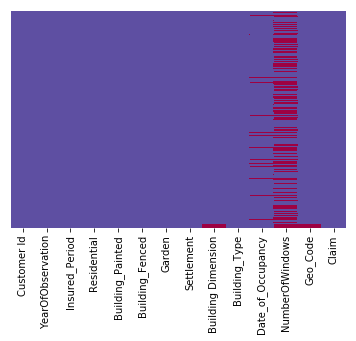

In [489]:
####Missing Data
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='Spectral_r')

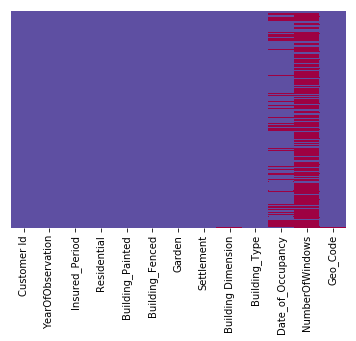

In [490]:
####Missing Data
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='Spectral_r')

In [491]:
train.drop(['Customer Id','Date_of_Occupancy', 'Geo_Code'], axis = 1, inplace = True)
test.drop(['Customer Id','Date_of_Occupancy', 'Geo_Code'], axis = 1, inplace = True)

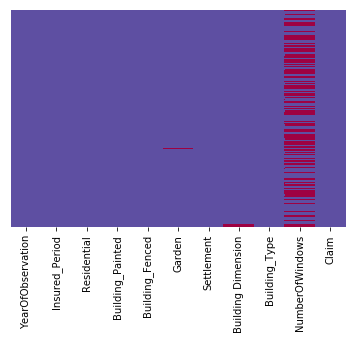

In [492]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='Spectral_r')

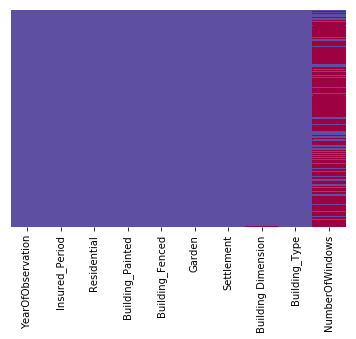

In [493]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='Spectral_r')

In [494]:
train.NumberOfWindows.bfill(axis = None, inplace = True)
test.NumberOfWindows.bfill(axis = None, inplace = True)

In [495]:
train.NumberOfWindows.ffill(axis = None, inplace = True)
test.NumberOfWindows.ffill(axis = None, inplace = True)

In [496]:
train.Garden.ffill(axis = None, inplace = True)
test.Garden.ffill(axis = None, inplace = True)


In [497]:
train['Building Dimension'].ffill(axis = None, inplace = True)
test['Building Dimension'].ffill(axis = None, inplace = True)


In [498]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 11 columns):
YearOfObservation     7160 non-null int64
Insured_Period        7160 non-null float64
Residential           7160 non-null int64
Building_Painted      7160 non-null object
Building_Fenced       7160 non-null object
Garden                7160 non-null object
Settlement            7160 non-null object
Building Dimension    7160 non-null float64
Building_Type         7160 non-null int64
NumberOfWindows       7160 non-null float64
Claim                 7160 non-null int64
dtypes: float64(3), int64(4), object(4)
memory usage: 615.4+ KB


In [499]:
pd.crosstab(train.Garden, train.Building_Fenced)

Building_Fenced,N,V
Garden,,
O,3605,1
V,3,3551


In [500]:
#indx = train[(train['Garden']=='unknown') &  (train['Building_Fenced']=='N')].index
#train.loc[indx, 'Garden'] = 'O'

#train.loc[indx, 'Garden'] = 'O'

In [501]:
#indx = test[(test['Garden']=='unknown') &  (test['Building_Fenced']=='N')].index
#test.loc[indx, 'Garden'] = 'O'

#test.loc[indx, 'Garden'] = 'O'

In [502]:
pd.crosstab(train.Garden, train.Building_Fenced) # Yes! Garden missing values filled

Building_Fenced,N,V
Garden,,
O,3605,1
V,3,3551


In [503]:
pd.crosstab(test.Garden, test.Building_Fenced) # Yes! Garden missing values filled

Building_Fenced,N,V
Garden,,
O,826,0
V,3,2240


In [504]:
train['Building Dimension'].value_counts()

400.0     150
500.0     120
300.0     118
450.0     117
600.0     114
         ... 
3762.0      1
211.0       1
1228.0      1
3508.0      1
1734.0      1
Name: Building Dimension, Length: 2043, dtype: int64

In [505]:
train.describe()

,YearOfObservation,Insured_Period,Residential,Building Dimension,Building_Type,NumberOfWindows,Claim
count,7160.000000,7160.000000,7160.000000,7160.000000,7160.000000,7160.000000,7160.000000
mean,2013.669553,0.909758,0.305447,1895.597626,2.186034,4.335615,0.228212
std,1.383769,0.239756,0.460629,2263.644254,0.940632,1.810267,0.419709
min,2012.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,2012.000000,0.997268,0.000000,530.000000,2.000000,3.000000,0.000000
50%,2013.000000,1.000000,0.000000,1100.000000,2.000000,4.000000,0.000000
75%,2015.000000,1.000000,1.000000,2400.000000,3.000000,5.000000,0.000000
max,2016.000000,1.000000,1.000000,20940.000000,4.000000,10.000000,1.000000


In [506]:
#train.replace('unknown', 1500, inplace = True)

In [507]:
train.tail(50)

,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Claim
7110,2013,0.328767,1,V,V,V,U,2732.0,2,3.0,0
7111,2012,1.000000,0,V,V,V,U,2732.0,3,3.0,1
7112,2012,1.000000,0,V,V,V,U,2732.0,2,3.0,0
7113,2013,1.000000,1,V,V,V,U,2732.0,3,3.0,0
7114,2013,0.791781,0,V,V,V,U,2732.0,2,3.0,1
7115,2013,0.495890,0,V,V,V,U,2732.0,1,3.0,0
7116,2014,1.000000,0,V,V,V,U,2732.0,2,3.0,0
7117,2012,1.000000,1,V,V,V,U,2732.0,2,3.0,1
7118,2015,0.682192,0,V,V,V,U,2732.0,2,3.0,0
7119,2012,1.000000,1,V,V,V,U,2732.0,3,3.0,0


In [508]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 11 columns):
YearOfObservation     7160 non-null int64
Insured_Period        7160 non-null float64
Residential           7160 non-null int64
Building_Painted      7160 non-null object
Building_Fenced       7160 non-null object
Garden                7160 non-null object
Settlement            7160 non-null object
Building Dimension    7160 non-null float64
Building_Type         7160 non-null int64
NumberOfWindows       7160 non-null float64
Claim                 7160 non-null int64
dtypes: float64(3), int64(4), object(4)
memory usage: 615.4+ KB


In [509]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3069 entries, 0 to 3068
Data columns (total 10 columns):
YearOfObservation     3069 non-null int64
Insured_Period        3069 non-null float64
Residential           3069 non-null int64
Building_Painted      3069 non-null object
Building_Fenced       3069 non-null object
Garden                3069 non-null object
Settlement            3069 non-null object
Building Dimension    3069 non-null float64
Building_Type         3069 non-null int64
NumberOfWindows       3069 non-null float64
dtypes: float64(3), int64(3), object(4)
memory usage: 239.9+ KB


In [510]:
train.columns

Index(['YearOfObservation', 'Insured_Period', 'Residential',
       'Building_Painted', 'Building_Fenced', 'Garden', 'Settlement',
       'Building Dimension', 'Building_Type', 'NumberOfWindows', 'Claim'],
      dtype='object')

In [511]:
train['Painted_Fenced_Garden'] = train.Building_Painted + '_' + train.Building_Fenced + '_' + train.Garden
train['Painted_Fenced'] = train.Building_Painted + '_' + train.Building_Fenced
train['Garden_Settlement'] = train.Garden + '_' + train.Settlement
train['Fenced_Garden_Settlement'] = train.Building_Fenced + '_' + train.Garden + '_' + train.Settlement
train['Painted_Fenced_Settlement'] = train.Building_Painted + '_' + train.Building_Fenced + '_' + train.Settlement
train['Painted_Fenced_Garden_Settlement'] = train.Building_Painted + '_' + train.Building_Fenced + '_' + train.Settlement

test['Painted_Fenced_Garden'] = test.Building_Painted + '_' + test.Building_Fenced + '_' + test.Garden
test['Painted_Fenced'] = test.Building_Painted + '_' + test.Building_Fenced
test['Garden_Settlement'] = test.Garden + '_' + test.Settlement
test['Fenced_Garden_Settlement'] = test.Building_Fenced + '_' + test.Garden + '_' + test.Settlement
test['Painted_Fenced_Settlement'] = test.Building_Painted + '_' + test.Building_Fenced + '_' + test.Settlement
test['Painted_Fenced_Garden_Settlement'] = test.Building_Painted + '_' + test.Building_Fenced + '_' + test.Settlement


In [513]:
train.head(20)

,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Claim,Painted_Fenced_Garden,Painted_Fenced,Garden_Settlement,Fenced_Garden_Settlement,Painted_Fenced_Settlement,Painted_Fenced_Garden_Settlement
0,2013,1.000000,0,N,V,V,U,290.0,1,4.0,0,N_V_V,N_V,V_U,V_V_U,N_V_U,N_V_U
1,2015,1.000000,0,V,N,O,R,490.0,1,4.0,0,V_N_O,V_N,O_R,N_O_R,V_N_R,V_N_R
2,2014,1.000000,0,N,V,V,U,595.0,1,3.0,0,N_V_V,N_V,V_U,V_V_U,N_V_U,N_V_U
3,2013,1.000000,0,V,V,V,U,2840.0,1,3.0,0,V_V_V,V_V,V_U,V_V_U,V_V_U,V_V_U
4,2014,1.000000,0,V,N,O,R,680.0,1,3.0,0,V_N_O,V_N,O_R,N_O_R,V_N_R,V_N_R
5,2012,1.000000,0,V,N,O,R,535.0,1,3.0,0,V_N_O,V_N,O_R,N_O_R,V_N_R,V_N_R
6,2012,1.000000,0,N,V,V,U,2830.0,1,3.0,0,N_V_V,N_V,V_U,V_V_U,N_V_U,N_V_U
7,2015,1.000000,0,N,V,V,U,4952.0,1,3.0,0,N_V_V,N_V,V_U,V_V_U,N_V_U,N_V_U
8,2014,1.000000,0,V,N,O,R,2735.0,1,3.0,1,V_N_O,V_N,O_R,N_O_R,V_N_R,V_N_R
9,2015,1.000000,0,V,N,O,R,520.0,1,2.0,0,V_N_O,V_N,O_R,N_O_R,V_N_R,V_N_R


In [445]:
#!pip install geopandas
#!pip install geopy

In [446]:
#from sklearn.preprocessing import LabelEncoder
#encoder = LabelEncoder()
#cat_features = ['YearOfObservation',
#       'Building_Painted', 'Building_Fenced', 'Garden', 'Settlement',
#       'NumberOfWindows', 'Claim']


In [514]:
y = train['Claim']
X = train.drop(['Claim'], axis=1)

In [ ]:
categorical_features_indices = np.where(X.dtypes != np.float)[0]
from catboost import CatBoostClassifier
from sklearn.metrics import log_loss
model=CatBoostClassifier(cat_features=categorical_features_indices)

parameters = {'depth'         : [6,8,10],
                  'learning_rate' : [0.01, 0.05, 0.1],
                  'iterations'    : [100, 200, 600 ]
                 }
grid = GridSearchCV(estimator=model, param_grid = parameters, cv = 2, n_jobs=-1)
grid.fit(X_train, y_train)    
    # Results from Grid Search
print("\n========================================================")
print(" Results from Grid Search " )
print("========================================================")    
    
print("\n The best estimator across ALL searched params:\n",grid.best_estimator_)
    
print("\n The best score across ALL searched params:\n",grid.best_score_)
    
print("\n The best parameters across ALL searched params:\n",grid.best_params_)
    
print("\n ========================================================")


In [448]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [449]:
train.Garden.unique

<bound method Series.unique of 0       V
1       O
2       V
3       V
4       O
       ..
7155    V
7156    V
7157    V
7158    V
7159    V
Name: Garden, Length: 7160, dtype: object>

In [468]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
cat_features = ['Building_Painted', 'Building_Fenced', 'Garden', 'Settlement',
            'Painted_Fenced_Garden', 'Painted_Fenced', 'Garden_Settlement', 'Fenced_Garden_Settlement',
           'Painted_Fenced_Settlement', 'Painted_Fenced_Garden_Settlement']

encoder = LabelEncoder()
encoded = train[cat_features].apply(encoder.fit_transform)
encoded_test = test[cat_features].apply(encoder.fit_transform)

train.drop(['Building_Painted', 'Building_Fenced', 'Garden', 'Settlement',
            'Painted_Fenced_Garden', 'Painted_Fenced', 'Garden_Settlement', 'Fenced_Garden_Settlement',
           'Painted_Fenced_Settlement', 'Painted_Fenced_Garden_Settlement'] , axis = 1, inplace = True)
test.drop(['Building_Painted', 'Building_Fenced', 'Garden', 'Settlement',
            'Painted_Fenced_Garden', 'Painted_Fenced', 'Garden_Settlement', 'Fenced_Garden_Settlement',
           'Painted_Fenced_Settlement', 'Painted_Fenced_Garden_Settlement'], axis = 1, inplace = True)


train= train.join(encoded)

test= test.join(encoded_test)


In [470]:
train.head()

,YearOfObservation,Insured_Period,Residential,Building Dimension,Building_Type,NumberOfWindows,Claim,Building_Painted,Building_Fenced,Garden,Settlement,Painted_Fenced_Garden,Painted_Fenced,Garden_Settlement,Fenced_Garden_Settlement,Painted_Fenced_Settlement,Painted_Fenced_Garden_Settlement
0,2013.0,1.0,0.0,290.0,1.0,4.0,0.0,0,1,1,1,1,1,2,4,1,1
1,2015.0,1.0,0.0,490.0,1.0,4.0,0.0,1,0,0,0,2,2,0,0,2,2
2,2014.0,1.0,0.0,595.0,1.0,3.0,0.0,0,1,1,1,1,1,2,4,1,1
3,2013.0,1.0,0.0,2840.0,1.0,3.0,0.0,1,1,1,1,5,3,2,4,4,4
4,2014.0,1.0,0.0,680.0,1.0,3.0,0.0,1,0,0,0,2,2,0,0,2,2


In [471]:
train = train.astype('float64')
test = test.astype('float64')

In [472]:
import lightgbm as lgb
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import auc, accuracy_score, roc_auc_score, roc_curve, f1_score
from sklearn.model_selection import GridSearchCV

In [473]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)
X_train.columns

Index(['YearOfObservation', 'Insured_Period', 'Residential',
       'Building_Painted', 'Building_Fenced', 'Garden', 'Settlement',
       'Building Dimension', 'Building_Type', 'NumberOfWindows',
       'Painted_Fenced_Garden', 'Painted_Fenced', 'Garden_Settlement',
       'Fenced_Garden_Settlement', 'Painted_Fenced_Settlement',
       'Painted_Fenced_Garden_Settlement'],
      dtype='object')

In [474]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 17 columns):
YearOfObservation                   7160 non-null float64
Insured_Period                      7160 non-null float64
Residential                         7160 non-null float64
Building Dimension                  7160 non-null float64
Building_Type                       7160 non-null float64
NumberOfWindows                     7160 non-null float64
Claim                               7160 non-null float64
Building_Painted                    7160 non-null float64
Building_Fenced                     7160 non-null float64
Garden                              7160 non-null float64
Settlement                          7160 non-null float64
Painted_Fenced_Garden               7160 non-null float64
Painted_Fenced                      7160 non-null float64
Garden_Settlement                   7160 non-null float64
Fenced_Garden_Settlement            7160 non-null float64
Painted_Fenced_Settleme

In [475]:
test.info()  #Building_Painted, Building_Fenced, Garden, Settlement, NumberOfWindows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3069 entries, 0 to 3068
Data columns (total 16 columns):
YearOfObservation                   3069 non-null float64
Insured_Period                      3069 non-null float64
Residential                         3069 non-null float64
Building Dimension                  3069 non-null float64
Building_Type                       3069 non-null float64
NumberOfWindows                     3069 non-null float64
Building_Painted                    3069 non-null float64
Building_Fenced                     3069 non-null float64
Garden                              3069 non-null float64
Settlement                          3069 non-null float64
Painted_Fenced_Garden               3069 non-null float64
Painted_Fenced                      3069 non-null float64
Garden_Settlement                   3069 non-null float64
Fenced_Garden_Settlement            3069 non-null float64
Painted_Fenced_Settlement           3069 non-null float64
Painted_Fenced_Garden_S

In [476]:
test.head()

,YearOfObservation,Insured_Period,Residential,Building Dimension,Building_Type,NumberOfWindows,Building_Painted,Building_Fenced,Garden,Settlement,Painted_Fenced_Garden,Painted_Fenced,Garden_Settlement,Fenced_Garden_Settlement,Painted_Fenced_Settlement,Painted_Fenced_Garden_Settlement
0,2013.0,1.000000,0.0,300.0,1.0,3.0,1.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,2.0,2.0
1,2016.0,0.997268,0.0,300.0,1.0,3.0,1.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,2.0,2.0
2,2013.0,0.369863,0.0,790.0,1.0,3.0,1.0,1.0,1.0,1.0,4.0,3.0,2.0,2.0,3.0,3.0
3,2014.0,1.000000,0.0,1405.0,1.0,3.0,1.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,2.0,2.0
4,2016.0,1.000000,0.0,1405.0,1.0,3.0,1.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,2.0,2.0


In [477]:
train['Building_Painted'].value_counts()

1.0    5382
0.0    1778
Name: Building_Painted, dtype: int64

In [478]:
###Save the new training to excel
filename = 'train_cleaning.csv'
train.to_csv(filename,index = False)
print('saved file:' + filename)

###Save the new test to excel
filename = 'test_cleaning.csv'
test.to_csv(filename,index = False)
print('saved file:' + filename)

PermissionError: [Errno 13] Permission denied: 'train_cleaning.csv'

In [479]:
from catboost import CatBoostClassifier
from sklearn.metrics import log_loss
model=CatBoostClassifier(cat_features=categorical_features_indices)


In [480]:
 parameters = {'depth'         : [6,8,10],
                  'learning_rate' : [0.01, 0.05, 0.1],
                  'iterations'    : [100, 200, 600 ]
                 }
grid = GridSearchCV(estimator=model, param_grid = parameters, cv = 2, n_jobs=-1)
grid.fit(X_train, y_train)    
    # Results from Grid Search
print("\n========================================================")
print(" Results from Grid Search " )
print("========================================================")    
    
print("\n The best estimator across ALL searched params:\n",grid.best_estimator_)
    
print("\n The best score across ALL searched params:\n",grid.best_score_)
    
print("\n The best parameters across ALL searched params:\n",grid.best_params_)
    
print("\n ========================================================")


JoblibCatBoostError: JoblibCatBoostError
___________________________________________________________________________
Multiprocessing exception:
...........................................................................
C:\Users\user\Anaconda3\lib\runpy.py in _run_module_as_main(mod_name='ipykernel_launcher', alter_argv=1)
    188         sys.exit(msg)
    189     main_globals = sys.modules["__main__"].__dict__
    190     if alter_argv:
    191         sys.argv[0] = mod_spec.origin
    192     return _run_code(code, main_globals, None,
--> 193                      "__main__", mod_spec)
        mod_spec = ModuleSpec(name='ipykernel_launcher', loader=<_f...nda3\\lib\\site-packages\\ipykernel_launcher.py')
    194 
    195 def run_module(mod_name, init_globals=None,
    196                run_name=None, alter_sys=False):
    197     """Execute a module's code without importing it

...........................................................................
C:\Users\user\Anaconda3\lib\runpy.py in _run_code(code=<code object <module> at 0x00000058159ADDB0, fil...lib\site-packages\ipykernel_launcher.py", line 5>, run_globals={'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': r'C:\Users\user\Anaconda3\lib\site-packages\__pycache__\ipykernel_launcher.cpython-36.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': r'C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...nda3\\lib\\site-packages\\ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from 'C:\\Users\\u...a3\\lib\\site-packages\\ipykernel\\kernelapp.py'>, ...}, init_globals=None, mod_name='__main__', mod_spec=ModuleSpec(name='ipykernel_launcher', loader=<_f...nda3\\lib\\site-packages\\ipykernel_launcher.py'), pkg_name='', script_name=None)
     80                        __cached__ = cached,
     81                        __doc__ = None,
     82                        __loader__ = loader,
     83                        __package__ = pkg_name,
     84                        __spec__ = mod_spec)
---> 85     exec(code, run_globals)
        code = <code object <module> at 0x00000058159ADDB0, fil...lib\site-packages\ipykernel_launcher.py", line 5>
        run_globals = {'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': r'C:\Users\user\Anaconda3\lib\site-packages\__pycache__\ipykernel_launcher.cpython-36.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': r'C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...nda3\\lib\\site-packages\\ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from 'C:\\Users\\u...a3\\lib\\site-packages\\ipykernel\\kernelapp.py'>, ...}
     86     return run_globals
     87 
     88 def _run_module_code(code, init_globals=None,
     89                     mod_name=None, mod_spec=None,

...........................................................................
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py in <module>()
     11     # This is added back by InteractiveShellApp.init_path()
     12     if sys.path[0] == '':
     13         del sys.path[0]
     14 
     15     from ipykernel import kernelapp as app
---> 16     app.launch_new_instance()

...........................................................................
C:\Users\user\Anaconda3\lib\site-packages\traitlets\config\application.py in launch_instance(cls=<class 'ipykernel.kernelapp.IPKernelApp'>, argv=None, **kwargs={})
    653 
    654         If a global instance already exists, this reinitializes and starts it
    655         """
    656         app = cls.instance(**kwargs)
    657         app.initialize(argv)
--> 658         app.start()
        app.start = <bound method IPKernelApp.start of <ipykernel.kernelapp.IPKernelApp object>>
    659 
    660 #-----------------------------------------------------------------------------
    661 # utility functions, for convenience
    662 #-----------------------------------------------------------------------------

...........................................................................
C:\Users\user\Anaconda3\lib\site-packages\ipykernel\kernelapp.py in start(self=<ipykernel.kernelapp.IPKernelApp object>)
    481         if self.poller is not None:
    482             self.poller.start()
    483         self.kernel.start()
    484         self.io_loop = ioloop.IOLoop.current()
    485         try:
--> 486             self.io_loop.start()
        self.io_loop.start = <bound method BaseAsyncIOLoop.start of <tornado.platform.asyncio.AsyncIOMainLoop object>>
    487         except KeyboardInterrupt:
    488             pass
    489 
    490 launch_new_instance = IPKernelApp.launch_instance

...........................................................................
C:\Users\user\Anaconda3\lib\site-packages\tornado\platform\asyncio.py in start(self=<tornado.platform.asyncio.AsyncIOMainLoop object>)
    122         except (RuntimeError, AssertionError):
    123             old_loop = None
    124         try:
    125             self._setup_logging()
    126             asyncio.set_event_loop(self.asyncio_loop)
--> 127             self.asyncio_loop.run_forever()
        self.asyncio_loop.run_forever = <bound method BaseEventLoop.run_forever of <_Win...EventLoop running=True closed=False debug=False>>
    128         finally:
    129             asyncio.set_event_loop(old_loop)
    130 
    131     def stop(self):

...........................................................................
C:\Users\user\Anaconda3\lib\asyncio\base_events.py in run_forever(self=<_WindowsSelectorEventLoop running=True closed=False debug=False>)
    417             sys.set_asyncgen_hooks(firstiter=self._asyncgen_firstiter_hook,
    418                                    finalizer=self._asyncgen_finalizer_hook)
    419         try:
    420             events._set_running_loop(self)
    421             while True:
--> 422                 self._run_once()
        self._run_once = <bound method BaseEventLoop._run_once of <_Windo...EventLoop running=True closed=False debug=False>>
    423                 if self._stopping:
    424                     break
    425         finally:
    426             self._stopping = False

...........................................................................
C:\Users\user\Anaconda3\lib\asyncio\base_events.py in _run_once(self=<_WindowsSelectorEventLoop running=True closed=False debug=False>)
   1427                         logger.warning('Executing %s took %.3f seconds',
   1428                                        _format_handle(handle), dt)
   1429                 finally:
   1430                     self._current_handle = None
   1431             else:
-> 1432                 handle._run()
        handle._run = <bound method Handle._run of <Handle BaseAsyncIOLoop._handle_events(848, 1)>>
   1433         handle = None  # Needed to break cycles when an exception occurs.
   1434 
   1435     def _set_coroutine_wrapper(self, enabled):
   1436         try:

...........................................................................
C:\Users\user\Anaconda3\lib\asyncio\events.py in _run(self=<Handle BaseAsyncIOLoop._handle_events(848, 1)>)
    140             self._callback = None
    141             self._args = None
    142 
    143     def _run(self):
    144         try:
--> 145             self._callback(*self._args)
        self._callback = <bound method BaseAsyncIOLoop._handle_events of <tornado.platform.asyncio.AsyncIOMainLoop object>>
        self._args = (848, 1)
    146         except Exception as exc:
    147             cb = _format_callback_source(self._callback, self._args)
    148             msg = 'Exception in callback {}'.format(cb)
    149             context = {

...........................................................................
C:\Users\user\Anaconda3\lib\site-packages\tornado\platform\asyncio.py in _handle_events(self=<tornado.platform.asyncio.AsyncIOMainLoop object>, fd=848, events=1)
    112             self.writers.remove(fd)
    113         del self.handlers[fd]
    114 
    115     def _handle_events(self, fd, events):
    116         fileobj, handler_func = self.handlers[fd]
--> 117         handler_func(fileobj, events)
        handler_func = <function wrap.<locals>.null_wrapper>
        fileobj = <zmq.sugar.socket.Socket object>
        events = 1
    118 
    119     def start(self):
    120         try:
    121             old_loop = asyncio.get_event_loop()

...........................................................................
C:\Users\user\Anaconda3\lib\site-packages\tornado\stack_context.py in null_wrapper(*args=(<zmq.sugar.socket.Socket object>, 1), **kwargs={})
    271         # Fast path when there are no active contexts.
    272         def null_wrapper(*args, **kwargs):
    273             try:
    274                 current_state = _state.contexts
    275                 _state.contexts = cap_contexts[0]
--> 276                 return fn(*args, **kwargs)
        args = (<zmq.sugar.socket.Socket object>, 1)
        kwargs = {}
    277             finally:
    278                 _state.contexts = current_state
    279         null_wrapper._wrapped = True
    280         return null_wrapper

...........................................................................
C:\Users\user\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py in _handle_events(self=<zmq.eventloop.zmqstream.ZMQStream object>, fd=<zmq.sugar.socket.Socket object>, events=1)
    445             return
    446         zmq_events = self.socket.EVENTS
    447         try:
    448             # dispatch events:
    449             if zmq_events & zmq.POLLIN and self.receiving():
--> 450                 self._handle_recv()
        self._handle_recv = <bound method ZMQStream._handle_recv of <zmq.eventloop.zmqstream.ZMQStream object>>
    451                 if not self.socket:
    452                     return
    453             if zmq_events & zmq.POLLOUT and self.sending():
    454                 self._handle_send()

...........................................................................
C:\Users\user\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py in _handle_recv(self=<zmq.eventloop.zmqstream.ZMQStream object>)
    475             else:
    476                 raise
    477         else:
    478             if self._recv_callback:
    479                 callback = self._recv_callback
--> 480                 self._run_callback(callback, msg)
        self._run_callback = <bound method ZMQStream._run_callback of <zmq.eventloop.zmqstream.ZMQStream object>>
        callback = <function wrap.<locals>.null_wrapper>
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    481         
    482 
    483     def _handle_send(self):
    484         """Handle a send event."""

...........................................................................
C:\Users\user\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py in _run_callback(self=<zmq.eventloop.zmqstream.ZMQStream object>, callback=<function wrap.<locals>.null_wrapper>, *args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    427         close our socket."""
    428         try:
    429             # Use a NullContext to ensure that all StackContexts are run
    430             # inside our blanket exception handler rather than outside.
    431             with stack_context.NullContext():
--> 432                 callback(*args, **kwargs)
        callback = <function wrap.<locals>.null_wrapper>
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    433         except:
    434             gen_log.error("Uncaught exception in ZMQStream callback",
    435                           exc_info=True)
    436             # Re-raise the exception so that IOLoop.handle_callback_exception

...........................................................................
C:\Users\user\Anaconda3\lib\site-packages\tornado\stack_context.py in null_wrapper(*args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    271         # Fast path when there are no active contexts.
    272         def null_wrapper(*args, **kwargs):
    273             try:
    274                 current_state = _state.contexts
    275                 _state.contexts = cap_contexts[0]
--> 276                 return fn(*args, **kwargs)
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    277             finally:
    278                 _state.contexts = current_state
    279         null_wrapper._wrapped = True
    280         return null_wrapper

...........................................................................
C:\Users\user\Anaconda3\lib\site-packages\ipykernel\kernelbase.py in dispatcher(msg=[<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>])
    278         if self.control_stream:
    279             self.control_stream.on_recv(self.dispatch_control, copy=False)
    280 
    281         def make_dispatcher(stream):
    282             def dispatcher(msg):
--> 283                 return self.dispatch_shell(stream, msg)
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    284             return dispatcher
    285 
    286         for s in self.shell_streams:
    287             s.on_recv(make_dispatcher(s), copy=False)

...........................................................................
C:\Users\user\Anaconda3\lib\site-packages\ipykernel\kernelbase.py in dispatch_shell(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, msg={'buffers': [], 'content': {'allow_stdin': True, 'code': ' parameters = {\'depth\'         : [6,8,10],\n     ...==============================================")\n', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2019, 11, 23, 6, 47, 32, 542185, tzinfo=tzutc()), 'msg_id': '86c9e63bc8b0410da65b4f355779e087', 'msg_type': 'execute_request', 'session': 'bb007be520f641409fb07ce2777e9b67', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': '86c9e63bc8b0410da65b4f355779e087', 'msg_type': 'execute_request', 'parent_header': {}})
    228             self.log.warn("Unknown message type: %r", msg_type)
    229         else:
    230             self.log.debug("%s: %s", msg_type, msg)
    231             self.pre_handler_hook()
    232             try:
--> 233                 handler(stream, idents, msg)
        handler = <bound method Kernel.execute_request of <ipykernel.ipkernel.IPythonKernel object>>
        stream = <zmq.eventloop.zmqstream.ZMQStream object>
        idents = [b'bb007be520f641409fb07ce2777e9b67']
        msg = {'buffers': [], 'content': {'allow_stdin': True, 'code': ' parameters = {\'depth\'         : [6,8,10],\n     ...==============================================")\n', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2019, 11, 23, 6, 47, 32, 542185, tzinfo=tzutc()), 'msg_id': '86c9e63bc8b0410da65b4f355779e087', 'msg_type': 'execute_request', 'session': 'bb007be520f641409fb07ce2777e9b67', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': '86c9e63bc8b0410da65b4f355779e087', 'msg_type': 'execute_request', 'parent_header': {}}
    234             except Exception:
    235                 self.log.error("Exception in message handler:", exc_info=True)
    236             finally:
    237                 self.post_handler_hook()

...........................................................................
C:\Users\user\Anaconda3\lib\site-packages\ipykernel\kernelbase.py in execute_request(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, ident=[b'bb007be520f641409fb07ce2777e9b67'], parent={'buffers': [], 'content': {'allow_stdin': True, 'code': ' parameters = {\'depth\'         : [6,8,10],\n     ...==============================================")\n', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2019, 11, 23, 6, 47, 32, 542185, tzinfo=tzutc()), 'msg_id': '86c9e63bc8b0410da65b4f355779e087', 'msg_type': 'execute_request', 'session': 'bb007be520f641409fb07ce2777e9b67', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': '86c9e63bc8b0410da65b4f355779e087', 'msg_type': 'execute_request', 'parent_header': {}})
    394         if not silent:
    395             self.execution_count += 1
    396             self._publish_execute_input(code, parent, self.execution_count)
    397 
    398         reply_content = self.do_execute(code, silent, store_history,
--> 399                                         user_expressions, allow_stdin)
        user_expressions = {}
        allow_stdin = True
    400 
    401         # Flush output before sending the reply.
    402         sys.stdout.flush()
    403         sys.stderr.flush()

...........................................................................
C:\Users\user\Anaconda3\lib\site-packages\ipykernel\ipkernel.py in do_execute(self=<ipykernel.ipkernel.IPythonKernel object>, code=' parameters = {\'depth\'         : [6,8,10],\n     ...==============================================")\n', silent=False, store_history=True, user_expressions={}, allow_stdin=True)
    203 
    204         self._forward_input(allow_stdin)
    205 
    206         reply_content = {}
    207         try:
--> 208             res = shell.run_cell(code, store_history=store_history, silent=silent)
        res = undefined
        shell.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = ' parameters = {\'depth\'         : [6,8,10],\n     ...==============================================")\n'
        store_history = True
        silent = False
    209         finally:
    210             self._restore_input()
    211 
    212         if res.error_before_exec is not None:

...........................................................................
C:\Users\user\Anaconda3\lib\site-packages\ipykernel\zmqshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, *args=(' parameters = {\'depth\'         : [6,8,10],\n     ...==============================================")\n',), **kwargs={'silent': False, 'store_history': True})
    532             )
    533         self.payload_manager.write_payload(payload)
    534 
    535     def run_cell(self, *args, **kwargs):
    536         self._last_traceback = None
--> 537         return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
        self.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        args = (' parameters = {\'depth\'         : [6,8,10],\n     ...==============================================")\n',)
        kwargs = {'silent': False, 'store_history': True}
    538 
    539     def _showtraceback(self, etype, evalue, stb):
    540         # try to preserve ordering of tracebacks and print statements
    541         sys.stdout.flush()

...........................................................................
C:\Users\user\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell=' parameters = {\'depth\'         : [6,8,10],\n     ...==============================================")\n', store_history=True, silent=False, shell_futures=True)
   2657         -------
   2658         result : :class:`ExecutionResult`
   2659         """
   2660         try:
   2661             result = self._run_cell(
-> 2662                 raw_cell, store_history, silent, shell_futures)
        raw_cell = ' parameters = {\'depth\'         : [6,8,10],\n     ...==============================================")\n'
        store_history = True
        silent = False
        shell_futures = True
   2663         finally:
   2664             self.events.trigger('post_execute')
   2665             if not silent:
   2666                 self.events.trigger('post_run_cell', result)

...........................................................................
C:\Users\user\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py in _run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell=' parameters = {\'depth\'         : [6,8,10],\n     ...==============================================")\n', store_history=True, silent=False, shell_futures=True)
   2780                 self.displayhook.exec_result = result
   2781 
   2782                 # Execute the user code
   2783                 interactivity = 'none' if silent else self.ast_node_interactivity
   2784                 has_raised = self.run_ast_nodes(code_ast.body, cell_name,
-> 2785                    interactivity=interactivity, compiler=compiler, result=result)
        interactivity = 'last_expr'
        compiler = <IPython.core.compilerop.CachingCompiler object>
   2786                 
   2787                 self.last_execution_succeeded = not has_raised
   2788                 self.last_execution_result = result
   2789 

...........................................................................
C:\Users\user\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py in run_ast_nodes(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, nodelist=[<_ast.Assign object>, <_ast.Assign object>, <_ast.Expr object>, <_ast.Expr object>, <_ast.Expr object>, <_ast.Expr object>, <_ast.Expr object>, <_ast.Expr object>, <_ast.Expr object>, <_ast.Expr object>], cell_name='<ipython-input-480-d71dcb5409ce>', interactivity='last', compiler=<IPython.core.compilerop.CachingCompiler object>, result=<ExecutionResult object at 5838101b38, execution...rue silent=False shell_futures=True> result=None>)
   2898 
   2899         try:
   2900             for i, node in enumerate(to_run_exec):
   2901                 mod = ast.Module([node])
   2902                 code = compiler(mod, cell_name, "exec")
-> 2903                 if self.run_code(code, result):
        self.run_code = <bound method InteractiveShell.run_code of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = <code object <module> at 0x00000058329E6C00, file "<ipython-input-480-d71dcb5409ce>", line 6>
        result = <ExecutionResult object at 5838101b38, execution...rue silent=False shell_futures=True> result=None>
   2904                     return True
   2905 
   2906             for i, node in enumerate(to_run_interactive):
   2907                 mod = ast.Interactive([node])

...........................................................................
C:\Users\user\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py in run_code(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, code_obj=<code object <module> at 0x00000058329E6C00, file "<ipython-input-480-d71dcb5409ce>", line 6>, result=<ExecutionResult object at 5838101b38, execution...rue silent=False shell_futures=True> result=None>)
   2958         outflag = True  # happens in more places, so it's easier as default
   2959         try:
   2960             try:
   2961                 self.hooks.pre_run_code_hook()
   2962                 #rprint('Running code', repr(code_obj)) # dbg
-> 2963                 exec(code_obj, self.user_global_ns, self.user_ns)
        code_obj = <code object <module> at 0x00000058329E6C00, file "<ipython-input-480-d71dcb5409ce>", line 6>
        self.user_global_ns = {'CatBoostClassifier': <class 'catboost.core.CatBoostClassifier'>, 'DecisionTreeClassifier': <class 'sklearn.tree.tree.DecisionTreeClassifier'>, 'GridSearchCV': <class 'sklearn.model_selection._search.GridSearchCV'>, 'In': ['', "import numpy as np\nimport pandas as pd\nimport se..._ipython().run_line_magic('matplotlib', 'inline')", "train = pd.read_csv('train_data.csv')\ntest = pd.read_csv('test_data.csv')", 'train.head()', 'train.shape()', 'train.shape', 'train.head()', 'train.columns', 'test.head()', 'train.info()', 'test.info()', "####Missing Data\nsns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='Spectral_r')", "####Missing Data\nsns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='Spectral_r')", "train['Garden'].isnull()", "sns.heatmap(train.Garden.isnull(),yticklabels=False,cbar=False,cmap='Spectral_r')", 'pd.crosstab(train.Settlement, train.Residential, train.Building_Type, train.Building_Painted)', 'pd.crosstab(train.Settlement, train.Residential)', "train.fillna('missing')", 'pd.crosstab(train.Settlement, train.Residential)', 'pd.crosstab(train.Settlement, train.Gender)', ...], 'LabelEncoder': <class 'sklearn.preprocessing.label.LabelEncoder'>, 'LogisticRegression': <class 'sklearn.linear_model.logistic.LogisticRegression'>, 'Out': {3:   Customer Id  YearOfObservation  Insured_Period...         1800.0               3     1053      0  , 5: (7160, 14), 6:   Customer Id  YearOfObservation  Insured_Period...         1800.0               3     1053      0  , 7: Index(['Customer Id', 'YearOfObservation', 'Insu...ows', 'Geo_Code', 'Claim'],
      dtype='object'), 8:   Customer Id  YearOfObservation  Insured_Period...  1             2004.0               3     3321  , 11: <matplotlib.axes._subplots.AxesSubplot object>, 12: <matplotlib.axes._subplots.AxesSubplot object>, 13: 0       False
1       False
2       False
3     ...    False
Name: Garden, Length: 7160, dtype: bool, 16: Residential     0     1
Settlement             
R            2371  1239
U            2602   948, 17:      Customer Id  YearOfObservation  Insured_Per...    .  missing      0  

[7160 rows x 14 columns], ...}, 'RandomForestClassifier': <class 'sklearn.ensemble.forest.RandomForestClassifier'>, 'X':       YearOfObservation  Insured_Period  Residen...                V_V_U  

[7160 rows x 16 columns], 'X_test':       YearOfObservation  Insured_Period  Residen...                V_V_U  

[1074 rows x 16 columns], ...}
        self.user_ns = {'CatBoostClassifier': <class 'catboost.core.CatBoostClassifier'>, 'DecisionTreeClassifier': <class 'sklearn.tree.tree.DecisionTreeClassifier'>, 'GridSearchCV': <class 'sklearn.model_selection._search.GridSearchCV'>, 'In': ['', "import numpy as np\nimport pandas as pd\nimport se..._ipython().run_line_magic('matplotlib', 'inline')", "train = pd.read_csv('train_data.csv')\ntest = pd.read_csv('test_data.csv')", 'train.head()', 'train.shape()', 'train.shape', 'train.head()', 'train.columns', 'test.head()', 'train.info()', 'test.info()', "####Missing Data\nsns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='Spectral_r')", "####Missing Data\nsns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='Spectral_r')", "train['Garden'].isnull()", "sns.heatmap(train.Garden.isnull(),yticklabels=False,cbar=False,cmap='Spectral_r')", 'pd.crosstab(train.Settlement, train.Residential, train.Building_Type, train.Building_Painted)', 'pd.crosstab(train.Settlement, train.Residential)', "train.fillna('missing')", 'pd.crosstab(train.Settlement, train.Residential)', 'pd.crosstab(train.Settlement, train.Gender)', ...], 'LabelEncoder': <class 'sklearn.preprocessing.label.LabelEncoder'>, 'LogisticRegression': <class 'sklearn.linear_model.logistic.LogisticRegression'>, 'Out': {3:   Customer Id  YearOfObservation  Insured_Period...         1800.0               3     1053      0  , 5: (7160, 14), 6:   Customer Id  YearOfObservation  Insured_Period...         1800.0               3     1053      0  , 7: Index(['Customer Id', 'YearOfObservation', 'Insu...ows', 'Geo_Code', 'Claim'],
      dtype='object'), 8:   Customer Id  YearOfObservation  Insured_Period...  1             2004.0               3     3321  , 11: <matplotlib.axes._subplots.AxesSubplot object>, 12: <matplotlib.axes._subplots.AxesSubplot object>, 13: 0       False
1       False
2       False
3     ...    False
Name: Garden, Length: 7160, dtype: bool, 16: Residential     0     1
Settlement             
R            2371  1239
U            2602   948, 17:      Customer Id  YearOfObservation  Insured_Per...    .  missing      0  

[7160 rows x 14 columns], ...}, 'RandomForestClassifier': <class 'sklearn.ensemble.forest.RandomForestClassifier'>, 'X':       YearOfObservation  Insured_Period  Residen...                V_V_U  

[7160 rows x 16 columns], 'X_test':       YearOfObservation  Insured_Period  Residen...                V_V_U  

[1074 rows x 16 columns], ...}
   2964             finally:
   2965                 # Reset our crash handler in place
   2966                 sys.excepthook = old_excepthook
   2967         except SystemExit as e:

...........................................................................
C:\Users\user\Desktop\DSN 2019 Bootcamp\Insurance Competition\<ipython-input-480-d71dcb5409ce> in <module>()
      1 parameters = {'depth'         : [6,8,10],
      2                  'learning_rate' : [0.01, 0.05, 0.1],
      3                  'iterations'    : [100, 200, 600 ]
      4                 }
      5 grid = GridSearchCV(estimator=model, param_grid = parameters, cv = 2, n_jobs=-1)
----> 6 grid.fit(X_train, y_train)    
      7    # Results from Grid Search
      8 print("\n========================================================")
      9 print(" Results from Grid Search " )
     10 print("========================================================")    

...........................................................................
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py in fit(self=GridSearchCV(cv=2, error_score='raise',
       e...ain_score='warn',
       scoring=None, verbose=0), X=      YearOfObservation  Insured_Period  Residen...                V_N_R  

[6086 rows x 16 columns], y=818     0
6725    1
1168    0
6396    1
2876    ...2732    0
Name: Claim, Length: 6086, dtype: int64, groups=None, **fit_params={})
    634                                   return_train_score=self.return_train_score,
    635                                   return_n_test_samples=True,
    636                                   return_times=True, return_parameters=False,
    637                                   error_score=self.error_score)
    638           for parameters, (train, test) in product(candidate_params,
--> 639                                                    cv.split(X, y, groups)))
        cv.split = <bound method StratifiedKFold.split of Stratifie...ld(n_splits=2, random_state=None, shuffle=False)>
        X =       YearOfObservation  Insured_Period  Residen...                V_N_R  

[6086 rows x 16 columns]
        y = 818     0
6725    1
1168    0
6396    1
2876    ...2732    0
Name: Claim, Length: 6086, dtype: int64
        groups = None
    640 
    641         # if one choose to see train score, "out" will contain train score info
    642         if self.return_train_score:
    643             (train_score_dicts, test_score_dicts, test_sample_counts, fit_time,

...........................................................................
C:\Users\user\Anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py in __call__(self=Parallel(n_jobs=-1), iterable=<generator object BaseSearchCV.fit.<locals>.<genexpr>>)
    784             if pre_dispatch == "all" or n_jobs == 1:
    785                 # The iterable was consumed all at once by the above for loop.
    786                 # No need to wait for async callbacks to trigger to
    787                 # consumption.
    788                 self._iterating = False
--> 789             self.retrieve()
        self.retrieve = <bound method Parallel.retrieve of Parallel(n_jobs=-1)>
    790             # Make sure that we get a last message telling us we are done
    791             elapsed_time = time.time() - self._start_time
    792             self._print('Done %3i out of %3i | elapsed: %s finished',
    793                         (len(self._output), len(self._output),

---------------------------------------------------------------------------
Sub-process traceback:
---------------------------------------------------------------------------
CatBoostError                                      Sat Nov 23 07:47:34 2019
PID: 16896                 Python 3.6.5: C:\Users\user\Anaconda3\python.exe
...........................................................................
C:\Users\user\Anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py in __call__(self=<sklearn.externals.joblib.parallel.BatchedCalls object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        self.items = [(<function _fit_and_score>, (<catboost.core.CatBoostClassifier object>,       YearOfObservation  Insured_Period  ...  Pa...                  V_N_R

[6086 rows x 16 columns], 818     0
6725    1
1168    0
6396    1
2876    ...2732    0
Name: Claim, Length: 6086, dtype: int64, {'score': <function _passthrough_scorer>}, array([3019, 3020, 3022, ..., 6083, 6084, 6085]), array([   0,    1,    2, ..., 3100, 3102, 3107]), 0, {'depth': 6, 'iterations': 100, 'learning_rate': 0.01}), {'error_score': 'raise', 'fit_params': {}, 'return_n_test_samples': True, 'return_parameters': False, 'return_times': True, 'return_train_score': 'warn'})]
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
C:\Users\user\Anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py in <listcomp>(.0=<list_iterator object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        func = <function _fit_and_score>
        args = (<catboost.core.CatBoostClassifier object>,       YearOfObservation  Insured_Period  ...  Pa...                  V_N_R

[6086 rows x 16 columns], 818     0
6725    1
1168    0
6396    1
2876    ...2732    0
Name: Claim, Length: 6086, dtype: int64, {'score': <function _passthrough_scorer>}, array([3019, 3020, 3022, ..., 6083, 6084, 6085]), array([   0,    1,    2, ..., 3100, 3102, 3107]), 0, {'depth': 6, 'iterations': 100, 'learning_rate': 0.01})
        kwargs = {'error_score': 'raise', 'fit_params': {}, 'return_n_test_samples': True, 'return_parameters': False, 'return_times': True, 'return_train_score': 'warn'}
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py in _fit_and_score(estimator=<catboost.core.CatBoostClassifier object>, X=      YearOfObservation  Insured_Period  ...  Pa...                  V_N_R

[6086 rows x 16 columns], y=818     0
6725    1
1168    0
6396    1
2876    ...2732    0
Name: Claim, Length: 6086, dtype: int64, scorer={'score': <function _passthrough_scorer>}, train=array([3019, 3020, 3022, ..., 6083, 6084, 6085]), test=array([   0,    1,    2, ..., 3100, 3102, 3107]), verbose=0, parameters={'depth': 6, 'iterations': 100, 'learning_rate': 0.01}, fit_params={}, return_train_score='warn', return_parameters=False, return_n_test_samples=True, return_times=True, error_score='raise')
    453 
    454     try:
    455         if y_train is None:
    456             estimator.fit(X_train, **fit_params)
    457         else:
--> 458             estimator.fit(X_train, y_train, **fit_params)
        estimator.fit = <bound method CatBoostClassifier.fit of <catboost.core.CatBoostClassifier object>>
        X_train =       YearOfObservation  Insured_Period  ...  Pa...                  V_N_R

[3043 rows x 16 columns]
        y_train = 3403    0
5108    0
4818    0
3870    0
4978    ...2732    0
Name: Claim, Length: 3043, dtype: int64
        fit_params = {}
    459 
    460     except Exception as e:
    461         # Note fit time as time until error
    462         fit_time = time.time() - start_time

...........................................................................
C:\Users\user\Anaconda3\lib\site-packages\catboost\core.py in fit(self=<catboost.core.CatBoostClassifier object>, X=      YearOfObservation  Insured_Period  ...  Pa...                  V_N_R

[3043 rows x 16 columns], y=3403    0
5108    0
4818    0
3870    0
4978    ...2732    0
Name: Claim, Length: 3043, dtype: int64, cat_features=None, sample_weight=None, baseline=None, use_best_model=None, eval_set=None, verbose=None, logging_level=None, plot=False, column_description=None, verbose_eval=None, metric_period=None, silent=None, early_stopping_rounds=None, save_snapshot=None, snapshot_file=None, snapshot_interval=None, init_model=None)
   3227         if 'loss_function' in params:
   3228             self._check_is_classification_objective(params['loss_function'])
   3229 
   3230         self._fit(X, y, cat_features, None, sample_weight, None, None, None, None, baseline, use_best_model,
   3231                   eval_set, verbose, logging_level, plot, column_description, verbose_eval, metric_period,
-> 3232                   silent, early_stopping_rounds, save_snapshot, snapshot_file, snapshot_interval, init_model)
        silent = None
        early_stopping_rounds = None
        save_snapshot = None
        snapshot_file = None
        snapshot_interval = None
        init_model = None
   3233         return self
   3234 
   3235     def predict(self, data, prediction_type='Class', ntree_start=0, ntree_end=0, thread_count=-1, verbose=None):
   3236         """

...........................................................................
C:\Users\user\Anaconda3\lib\site-packages\catboost\core.py in _fit(self=<catboost.core.CatBoostClassifier object>, X=      YearOfObservation  Insured_Period  ...  Pa...                  V_N_R

[3043 rows x 16 columns], y=3403    0
5108    0
4818    0
3870    0
4978    ...2732    0
Name: Claim, Length: 3043, dtype: int64, cat_features=None, pairs=None, sample_weight=None, group_id=None, group_weight=None, subgroup_id=None, pairs_weight=None, baseline=None, use_best_model=None, eval_set=None, verbose=None, logging_level=None, plot=False, column_description=None, verbose_eval=None, metric_period=None, silent=None, early_stopping_rounds=None, save_snapshot=None, snapshot_file=None, snapshot_interval=None, init_model=None)
   1338         train_params = self._prepare_train_params(
   1339             X, y, cat_features, pairs, sample_weight, group_id,
   1340             group_weight, subgroup_id, pairs_weight, baseline,
   1341             use_best_model, eval_set, verbose, logging_level, plot,
   1342             column_description, verbose_eval, metric_period, silent, early_stopping_rounds,
-> 1343             save_snapshot, snapshot_file, snapshot_interval, init_model
        save_snapshot = None
        snapshot_file = None
        snapshot_interval = None
        init_model = None
   1344         )
   1345         params = train_params["params"]
   1346         train_pool = train_params["train_pool"]
   1347         allow_clear_pool = train_params["allow_clear_pool"]

...........................................................................
C:\Users\user\Anaconda3\lib\site-packages\catboost\core.py in _prepare_train_params(self=<catboost.core.CatBoostClassifier object>, X=      YearOfObservation  Insured_Period  ...  Pa...                  V_N_R

[3043 rows x 16 columns], y=3403    0
5108    0
4818    0
3870    0
4978    ...2732    0
Name: Claim, Length: 3043, dtype: int64, cat_features=array([0, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64), pairs=None, sample_weight=None, group_id=None, group_weight=None, subgroup_id=None, pairs_weight=None, baseline=None, use_best_model=None, eval_set=None, verbose=None, logging_level=None, plot=False, column_description=None, verbose_eval=None, metric_period=None, silent=None, early_stopping_rounds=None, save_snapshot=None, snapshot_file=None, snapshot_interval=None, init_model=None)
   1233                     raise CatBoostError("categorical features in the model are set to " + str(params['cat_features']) +
   1234                                         ". categorical features passed to fit function are set to " + str(cat_features))
   1235                 cat_features = params['cat_features']
   1236             del params['cat_features']
   1237 
-> 1238         train_pool = _build_train_pool(X, y, cat_features, pairs, sample_weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, column_description)
        train_pool = undefined
        X =       YearOfObservation  Insured_Period  ...  Pa...                  V_N_R

[3043 rows x 16 columns]
        y = 3403    0
5108    0
4818    0
3870    0
4978    ...2732    0
Name: Claim, Length: 3043, dtype: int64
        cat_features = array([0, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)
        pairs = None
        sample_weight = None
        group_id = None
        group_weight = None
        subgroup_id = None
        pairs_weight = None
        baseline = None
        column_description = None
   1239         if train_pool.is_empty_:
   1240             raise CatBoostError("X is empty.")
   1241 
   1242         allow_clear_pool = not isinstance(X, Pool)

...........................................................................
C:\Users\user\Anaconda3\lib\site-packages\catboost\core.py in _build_train_pool(X=      YearOfObservation  Insured_Period  ...  Pa...                  V_N_R

[3043 rows x 16 columns], y=3403    0
5108    0
4818    0
3870    0
4978    ...2732    0
Name: Claim, Length: 3043, dtype: int64, cat_features=array([0, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64), pairs=None, sample_weight=None, group_id=None, group_weight=None, subgroup_id=None, pairs_weight=None, baseline=None, column_description=None)
    691             train_pool = Pool(data=X, pairs=pairs, column_description=column_description)
    692     else:
    693         if y is None:
    694             raise CatBoostError("y has not initialized in fit(): X is not catboost.Pool object, y must be not None in fit().")
    695         train_pool = Pool(X, y, cat_features=cat_features, pairs=pairs, weight=sample_weight, group_id=group_id,
--> 696                           group_weight=group_weight, subgroup_id=subgroup_id, pairs_weight=pairs_weight, baseline=baseline)
        group_weight = None
        subgroup_id = None
        pairs_weight = None
        baseline = None
    697     return train_pool
    698 
    699 
    700 def _clear_training_files(train_dir):

...........................................................................
C:\Users\user\Anaconda3\lib\site-packages\catboost\core.py in __init__(self=<catboost.core.Pool object>, data=      YearOfObservation  Insured_Period  ...  Pa...                  V_N_R

[3043 rows x 16 columns], label=3403    0
5108    0
4818    0
3870    0
4978    ...2732    0
Name: Claim, Length: 3043, dtype: int64, cat_features=array([0, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64), column_description=None, pairs=None, delimiter='\t', has_header=False, weight=None, group_id=None, group_weight=None, subgroup_id=None, pairs_weight=None, baseline=None, feature_names=None, thread_count=-1)
    320                         raise CatBoostError(
    321                             "'data' is numpy array of np.float32, it means no categorical features,"
    322                             " but 'cat_features' parameter specifies nonzero number of categorical features"
    323                         )
    324 
--> 325                 self._init(data, label, cat_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, feature_names)
        self._init = <bound method Pool._init of <catboost.core.Pool object>>
        data =       YearOfObservation  Insured_Period  ...  Pa...                  V_N_R

[3043 rows x 16 columns]
        label = 3403    0
5108    0
4818    0
3870    0
4978    ...2732    0
Name: Claim, Length: 3043, dtype: int64
        cat_features = array([0, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)
        pairs = None
        weight = None
        group_id = None
        group_weight = None
        subgroup_id = None
        pairs_weight = None
        baseline = None
        feature_names = None
    326         super(Pool, self).__init__()
    327 
    328     def _check_files(self, data, column_description, pairs):
    329         """

...........................................................................
C:\Users\user\Anaconda3\lib\site-packages\catboost\core.py in _init(self=<catboost.core.Pool object>, data=      YearOfObservation  Insured_Period  ...  Pa...                  V_N_R

[3043 rows x 16 columns], label=array([0, 0, 0, ..., 0, 1, 0], dtype=int64), cat_features=[0, 2, 3, 4, 5, 6, 7, 8, 9], pairs=None, weight=None, group_id=None, group_weight=None, subgroup_id=None, pairs_weight=None, baseline=None, feature_names=['YearOfObservation', 'Insured_Period', 'Residential', 'Building_Painted', 'Building_Fenced', 'Garden', 'Settlement', 'Building Dimension', 'Building_Type', 'NumberOfWindows', 'Painted_Fenced_Garden', 'Painted_Fenced', 'Garden_Settlement', 'Fenced_Garden_Settlement', 'Painted_Fenced_Settlement', 'Painted_Fenced_Garden_Settlement'])
    672         if baseline is not None:
    673             self._check_baseline_type(baseline)
    674             baseline = self._if_pandas_to_numpy(baseline)
    675             baseline = np.reshape(baseline, (samples_count, -1))
    676             self._check_baseline_shape(baseline, samples_count)
--> 677         self._init_pool(data, label, cat_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, feature_names)
        self._init_pool = <built-in method _init_pool of Pool object>
        data =       YearOfObservation  Insured_Period  ...  Pa...                  V_N_R

[3043 rows x 16 columns]
        label = array([0, 0, 0, ..., 0, 1, 0], dtype=int64)
        cat_features = [0, 2, 3, 4, 5, 6, 7, 8, 9]
        pairs = None
        weight = None
        group_id = None
        group_weight = None
        subgroup_id = None
        pairs_weight = None
        baseline = None
        feature_names = ['YearOfObservation', 'Insured_Period', 'Residential', 'Building_Painted', 'Building_Fenced', 'Garden', 'Settlement', 'Building Dimension', 'Building_Type', 'NumberOfWindows', 'Painted_Fenced_Garden', 'Painted_Fenced', 'Garden_Settlement', 'Fenced_Garden_Settlement', 'Painted_Fenced_Settlement', 'Painted_Fenced_Garden_Settlement']
    678 
    679 
    680 def _build_train_pool(X, y, cat_features, pairs, sample_weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, column_description):
    681     train_pool = None

...........................................................................
C:\Users\user\Anaconda3\lib\site-packages\catboost\_catboost.pyd in _catboost._PoolBase._init_pool()

...........................................................................
C:\Users\user\Anaconda3\lib\site-packages\catboost\_catboost.pyd in _catboost._PoolBase._init_pool()

...........................................................................
C:\Users\user\Anaconda3\lib\site-packages\catboost\_catboost.pyd in _catboost._PoolBase._init_features_order_layout_pool()

...........................................................................
C:\Users\user\Anaconda3\lib\site-packages\catboost\_catboost.pyd in _catboost._set_features_order_data_pd_data_frame()

...........................................................................
C:\Users\user\Anaconda3\lib\site-packages\catboost\_catboost.pyd in _catboost.create_num_factor_data()

...........................................................................
C:\Users\user\Anaconda3\lib\site-packages\catboost\_catboost.pyd in _catboost.get_float_feature()

CatBoostError: Bad value for num_feature[0,10]="N_V_V": Cannot convert 'b'N_V_V'' to float
___________________________________________________________________________

In [481]:
model=CatBoostClassifier(depth = 6, iterations= 200, learning_rate= 0.1, cat_features=categorical_features_indices)
model.fit(X_train, y_train,
       eval_set=(X_test, y_test),plot=True)

CatBoostError: Bad value for num_feature[0,10]="N_V_V": Cannot convert 'b'N_V_V'' to float

In [352]:
y_pred = model.predict_proba(test)[:, 1]
#y_predict = y_pred.astype('int64')

In [353]:
y_pred

array([0.10239414, 0.0762036 , 0.0509671 , ..., 0.25486506, 0.21786471,
       0.25486506])

In [354]:
dsn_test_s = pd.read_csv('test_data.csv')
submission = pd.DataFrame({'Customer Id':dsn_test_s['Customer Id'], 'Claim': y_pred})
submission

,Customer Id,Claim
0,H11920,0.102394
1,H11921,0.076204
2,H9805,0.050967
3,H7493,0.140547
4,H7494,0.140968
...,...,...
3064,H11583,0.355469
3065,H11720,0.254865
3066,H11721,0.254865
3067,H12408,0.217865


In [355]:
filename = 'my_prediction.csv'
submission.to_csv(filename,index = False)
print('saved file:' + filename)

saved file:my_prediction.csv


In [463]:
estimator = lgb.LGBMClassifier(learning_rate = 0.15, metric = 'l1', 
                        n_estimators = 24, num_leaves = 38)


param_grid = {
    'n_estimators': [x for x in range(24,40,2)],
    'learning_rate': [0.10, 0.125, 0.15, 0.175, 0.2]}
gridsearch = GridSearchCV(estimator, param_grid)

gridsearch.fit(X_train, y_train,
        eval_set = [(X_test, y_test)],
        eval_metric = ['auc', 'binary_logloss'],
        early_stopping_rounds = 5,
              verbose = 1)

ValueError: DataFrame.dtypes for data must be int, float or bool.
Did not expect the data types in fields Building_Painted, Building_Fenced, Garden, Settlement, Painted_Fenced_Garden, Painted_Fenced, Garden_Settlement, Fenced_Garden_Settlement, Painted_Fenced_Settlement, Painted_Fenced_Garden_Settlement